### Importing necessary libraries.

In [1]:
# numpy & pandas
import numpy as np
import pandas as pd
from math import sqrt

In [2]:
#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [4]:
#Machine learning Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## Data reading and understanding.

In [5]:
# Reading the data and importing into the DataFrame.
boom_bikes=pd.read_csv("day.csv")
boom_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# Checking the shape of dataset.
boom_bikes.shape

(730, 16)

In [7]:
# Checking the nature of data  and necesary information of dataset
boom_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# Checking the data distribution.
boom_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
#check for any missing of null values.
((boom_bikes.isnull().sum()/len(boom_bikes))*100).sort_values(ascending=False)

cnt           0.0
registered    0.0
casual        0.0
windspeed     0.0
hum           0.0
atemp         0.0
temp          0.0
weathersit    0.0
workingday    0.0
weekday       0.0
holiday       0.0
mnth          0.0
yr            0.0
season        0.0
dteday        0.0
instant       0.0
dtype: float64

 No null or missing values found.

## Visualizing the data

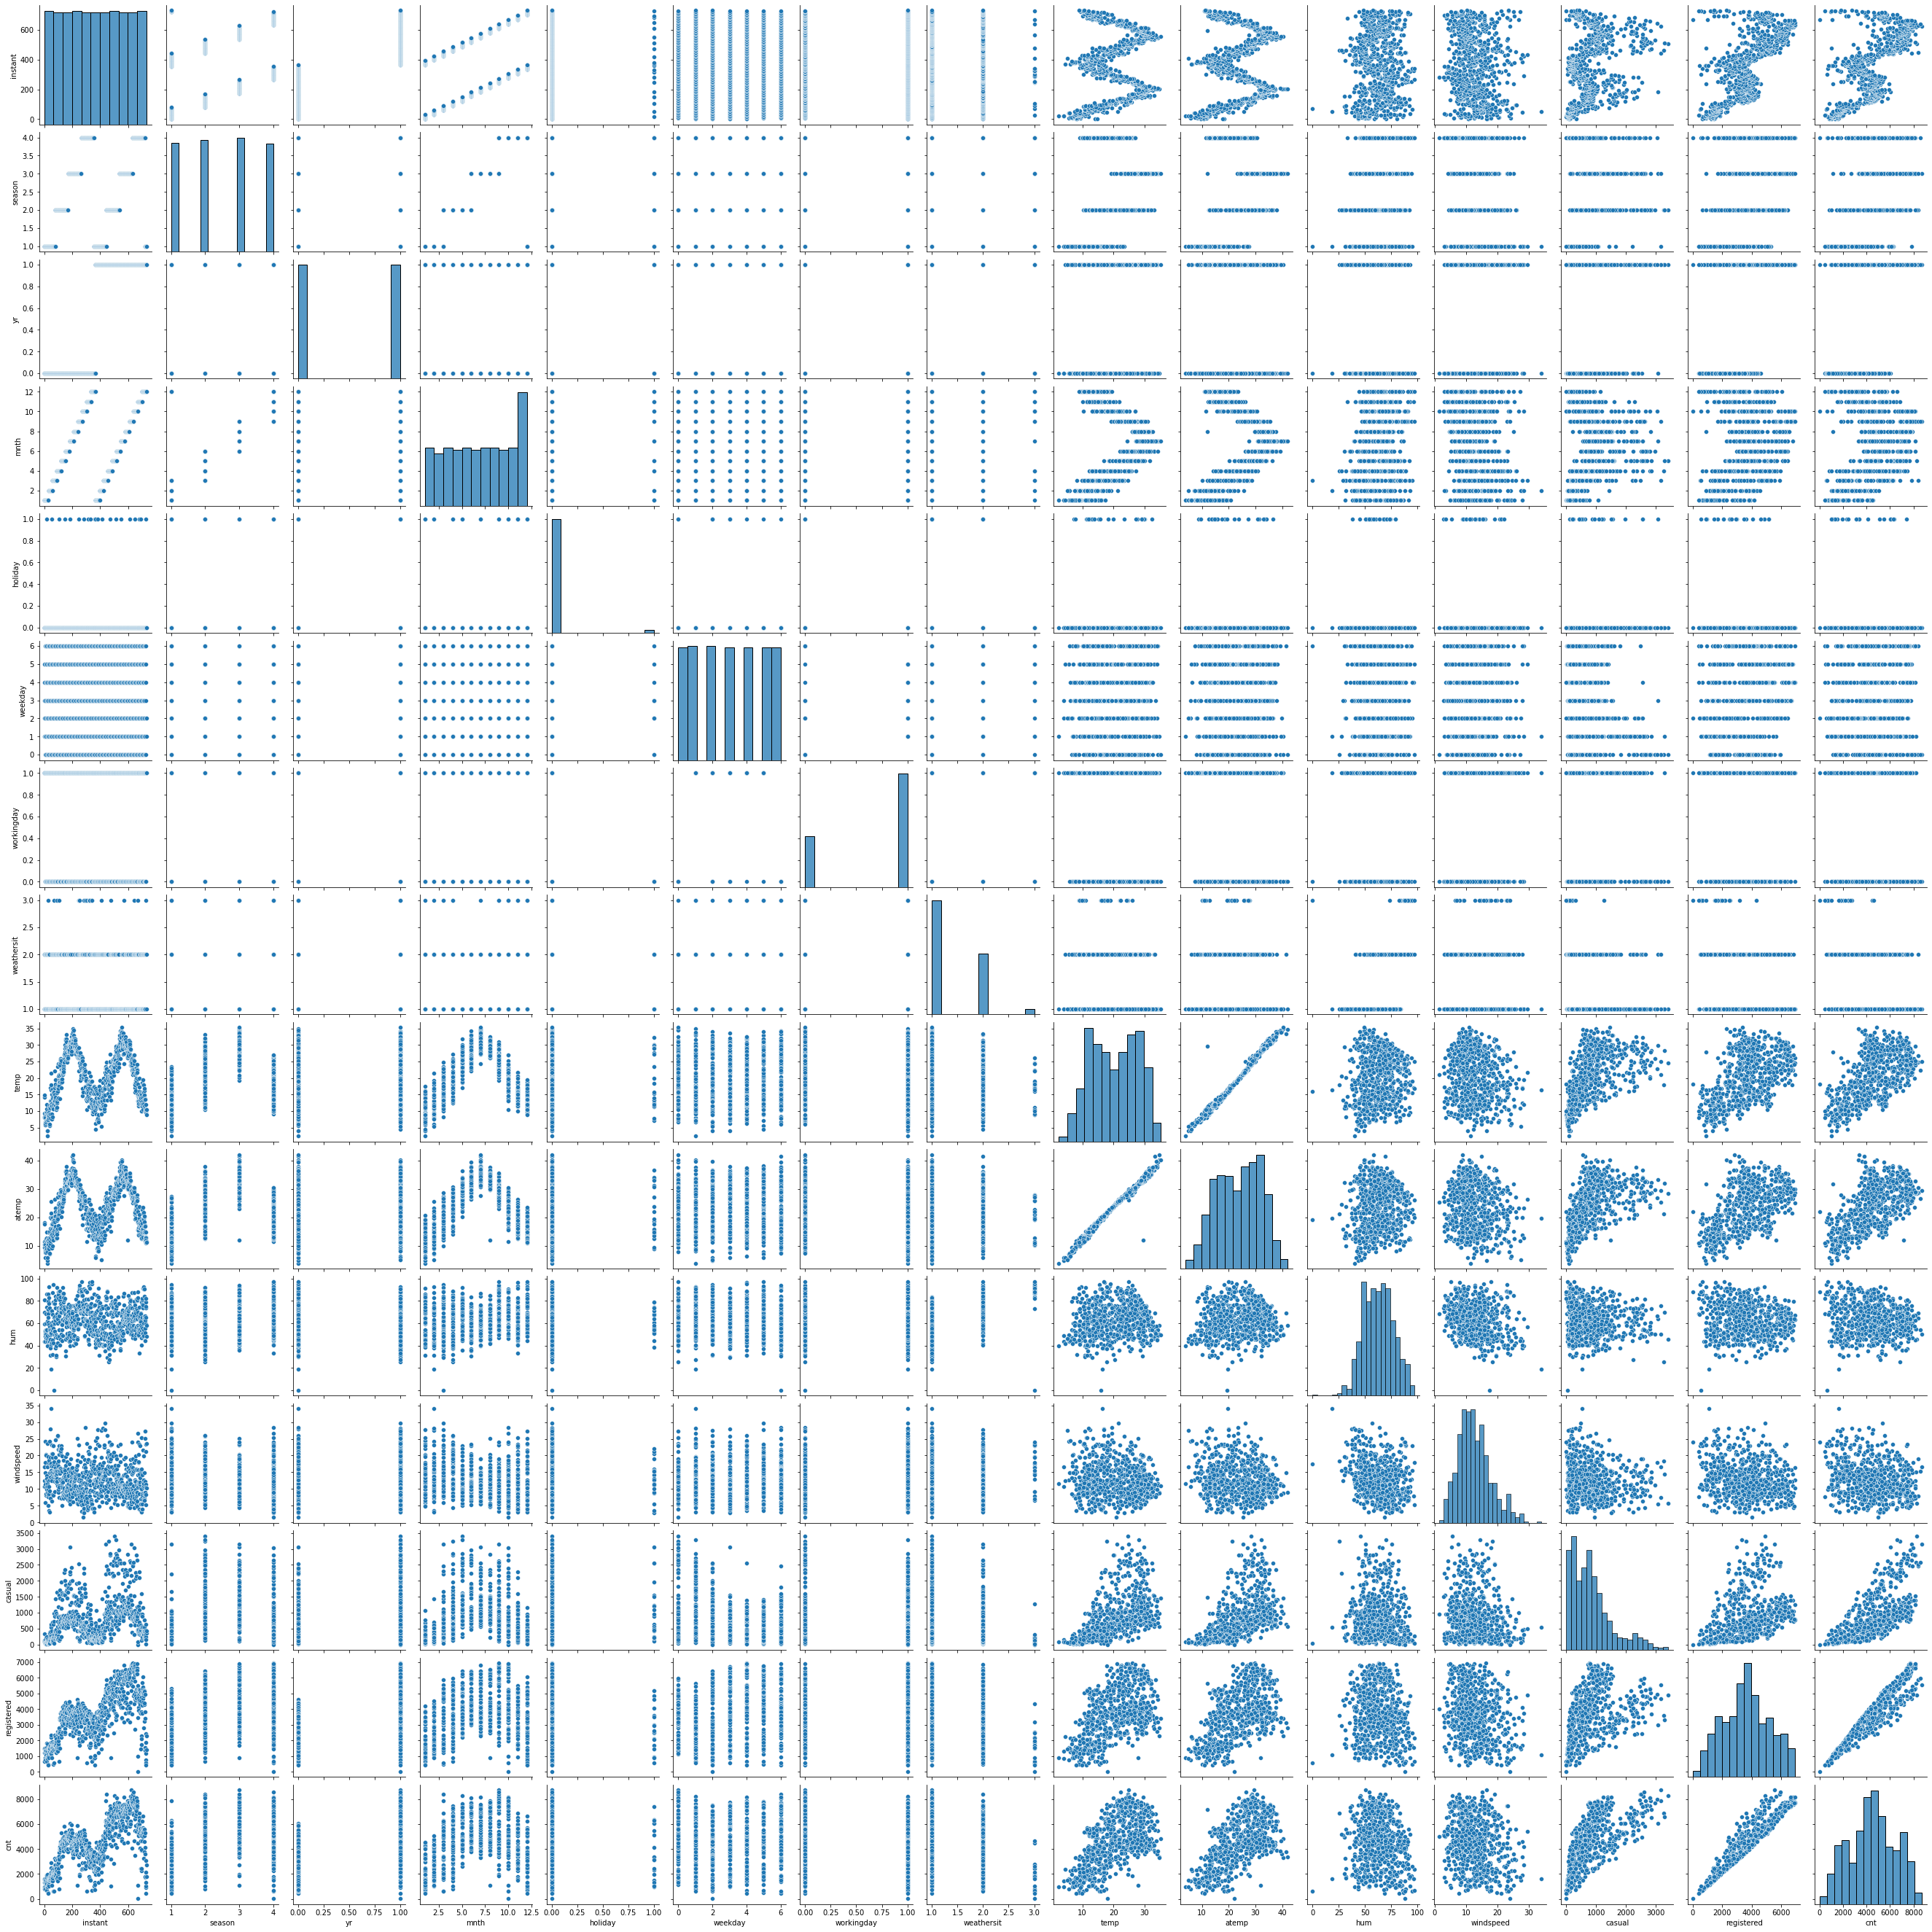

In [10]:
sns.pairplot(boom_bikes[["instant",
"dteday",
"season",
"yr",
"mnth",
"holiday",
"weekday",
"workingday",
"weathersit",
"temp",
"atemp",
"hum",
"windspeed",
"casual",
"registered",
"cnt"]])
plt.show()

##### * Here we can see that the temp and atemp variables have highest correlation with target variable cnt.

### Visualizing the redundant variables.

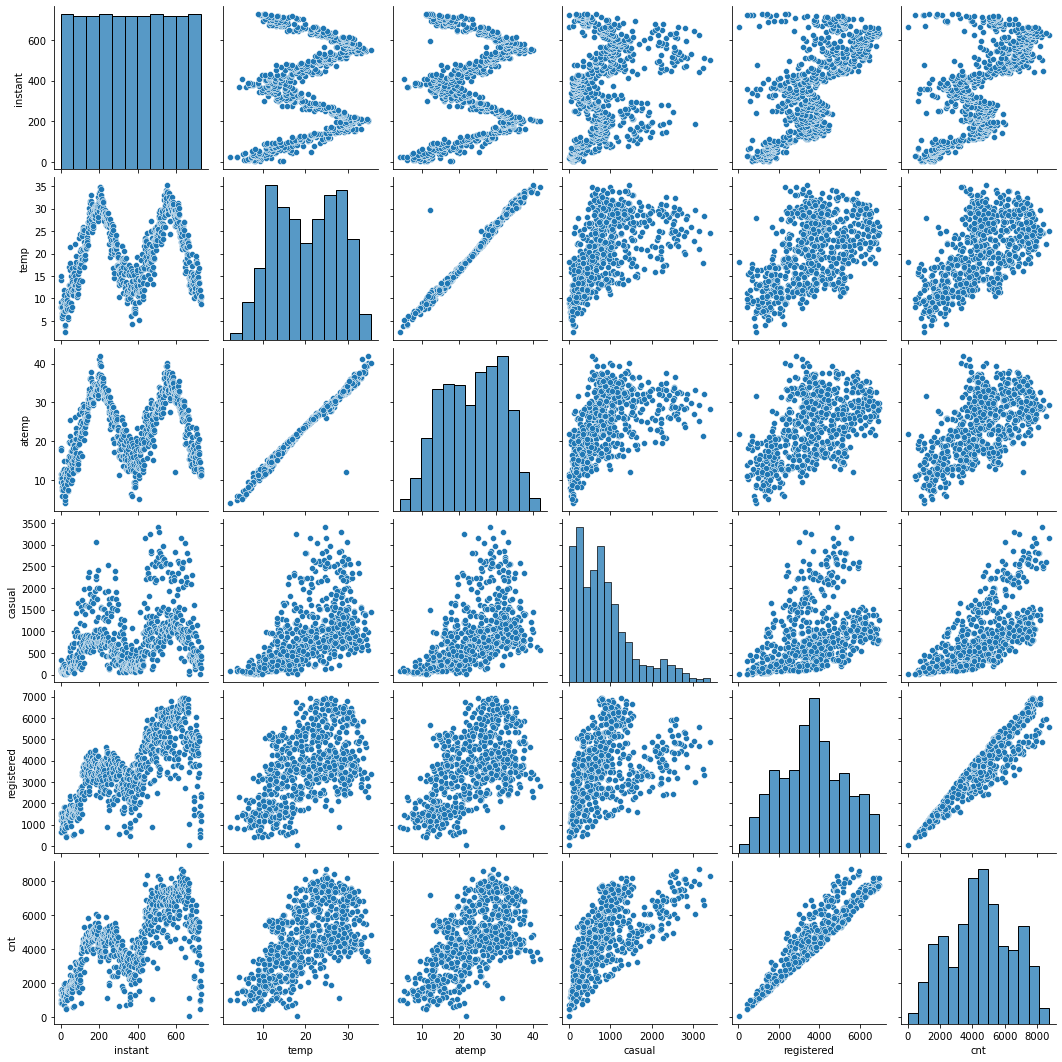

In [11]:
sns.pairplot(boom_bikes[["instant",
"dteday",
"temp",
"atemp",
"casual",
"registered",
"cnt"]])
plt.show()

#### * we see a clear relationship between temp and atemp.
#### * we see a clear relationship between cnt-casual and cnt-regstered. casual + registered = cnt 
#### * Also,instant is the just the serial number of the record hence of no real importance for analysis. 
#### * dteday is redundant because the required data for analysis is contained in mnth,yr.
#### * temp and atemp has the same purpose and information .

### since instant and dteday are not relevant we drop them.

In [12]:
boom_bikes=boom_bikes.drop("instant",axis=1)
boom_bikes=boom_bikes.drop("dteday",axis=1)

 ### Since registered and casual is directly correlated to the cnt . we drop them

In [13]:
boom_bikes=boom_bikes.drop("casual",axis=1)

In [14]:
boom_bikes=boom_bikes.drop("registered",axis=1)

### drop either temp or atemp , any one of them.


### droping temp because services has more association with what the weather feels like.

In [15]:
boom_bikes=boom_bikes.drop("temp",axis=1)

In [16]:
boom_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,11.46350,43.6957,12.522300,1600


## Data encoding.

#### Now we need to map the categorical data to their actual category names as mentioned in the dataset characteristics pdf .

season
1:spring, 
2:summer,
3:fall,
4:winter

In [17]:
map_season={1:"spring",2:"summer",3:"fall",4:'winter'}

boom_bikes.season=[map_season[i] for i in boom_bikes.season]

weathersit
1:clear
2:mist & cloudy
3:light rain & snow
4:heavy rain & snow

In [18]:
map_weather={1:"clear",2:"mist & cloudy",3:"light rain & snow",4:'heavy rain & snow'}

boom_bikes.weathersit=[map_weather[i] for i in boom_bikes.weathersit]

mnth 
1: Jan , 2: Feb , 3: Mar , 4: Apr , 5: May , 6: Jun , 7: Jul , 8: Aug , 9: Sep , 10: Oct , 11: Nov , 12: Dec

In [19]:
map_mnth={1: 'Jan' , 2: 'Feb' , 3: 'Mar' , 4: 'Apr' , 5: 'May' , 6: 'Jun' , 7: 'Jul' , 8: 'Aug' , 9: 'Sep' , 10: 'Oct' , 11: 'Nov' , 12: 'Dec'}

boom_bikes.mnth=[map_mnth[i] for i in boom_bikes.mnth]

weekday 
0: Sunday
1: Monday
2: Tuesday
3: Wednesday
4: Thursday
5: Friday
6: Saturday

In [20]:
map_weekday={0: 'Sunday',1: 'Monday',2: 'Tuesday',3: 'Wednesday',4: 'Thursday',5: 'Friday',6: 'Saturday'}

boom_bikes.weekday=[map_weekday[i] for i in boom_bikes.weekday]

yr
0: 2018
1: 2019

In [21]:
map_yr={0: '2018',1: '2019'}

boom_bikes.yr=[map_yr[i] for i in boom_bikes.yr]

## Categorical Variable Analysis

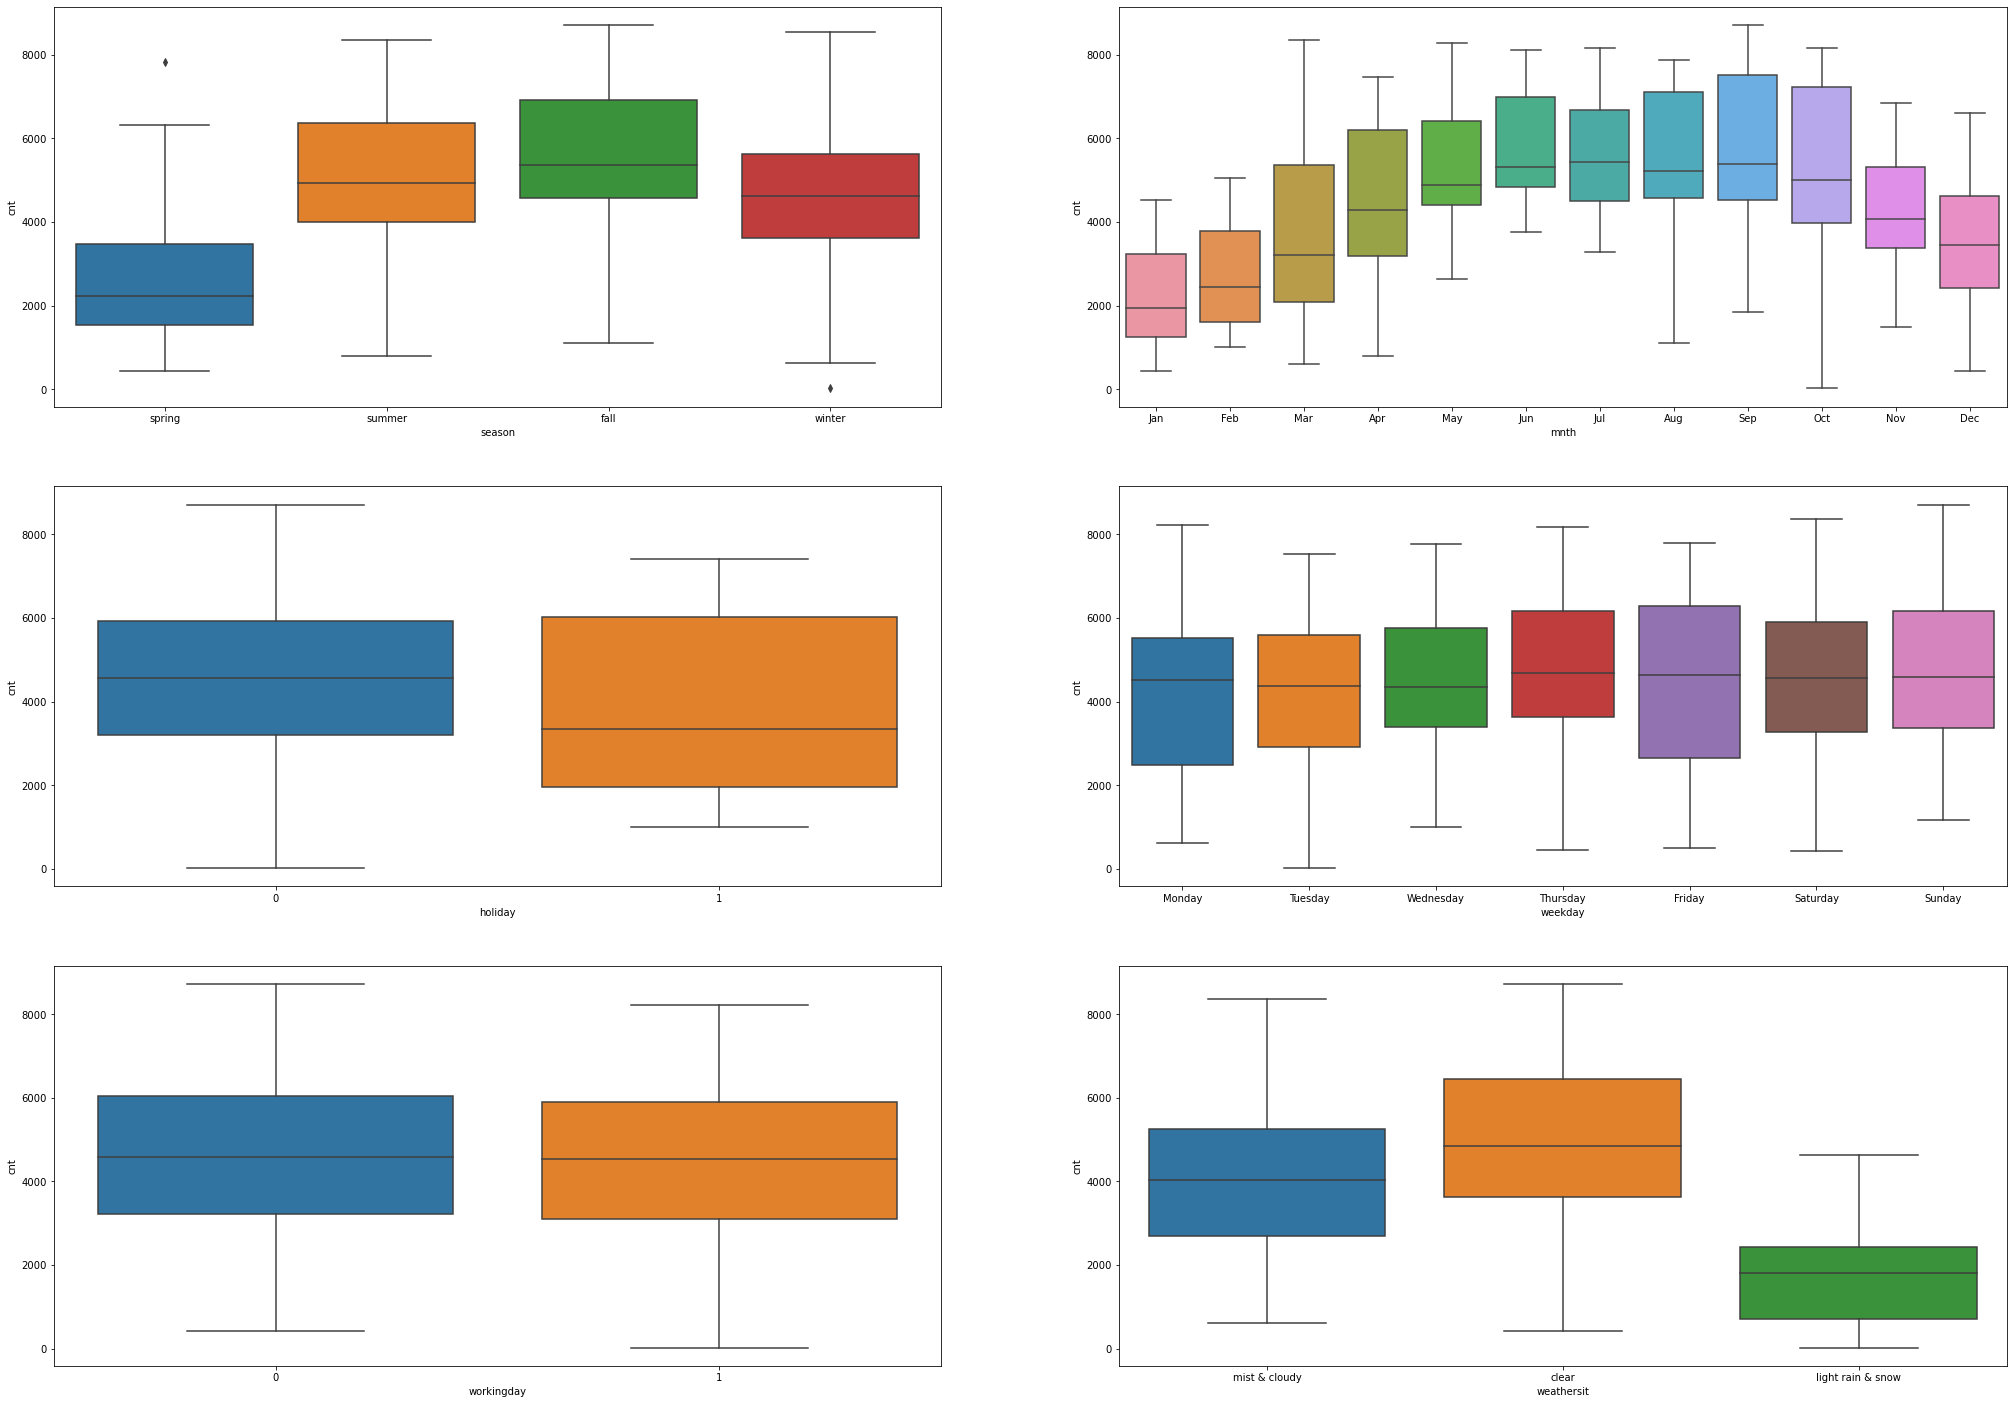

In [22]:
# Building boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(35, 25))
plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = boom_bikes)
plt.subplot(3,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = boom_bikes)
plt.subplot(3,2,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = boom_bikes)
plt.subplot(3,2,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = boom_bikes)
plt.subplot(3,2,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = boom_bikes)
plt.subplot(3,2,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = boom_bikes)
plt.show()

## Exploratory Data Analysis :
Analysis of various variables w.r.t 'cnt' ie., target variable through Visualization:

#### 1. Season :

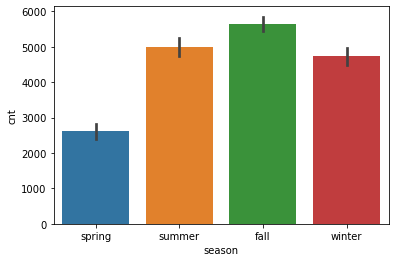

In [23]:
sns.barplot(x='season',y='cnt',data=boom_bikes)
plt.show()

#### 2. Year 

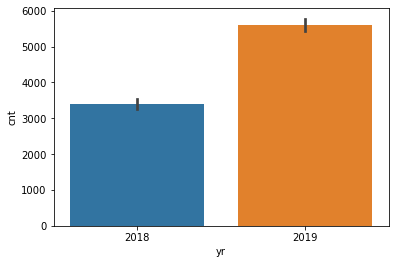

In [24]:
sns.barplot(x='yr',y='cnt',data=boom_bikes)
plt.show()

#### 3. Month

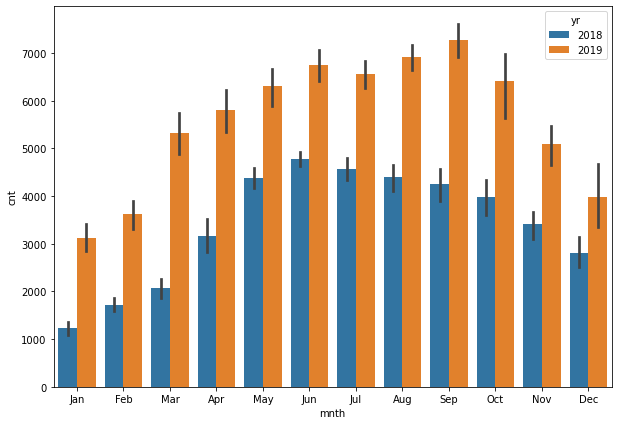

In [25]:
plt.figure(figsize=(10,7))
sns.barplot(x='mnth',y='cnt',data=boom_bikes,hue='yr')
plt.show()

#### 4. weather

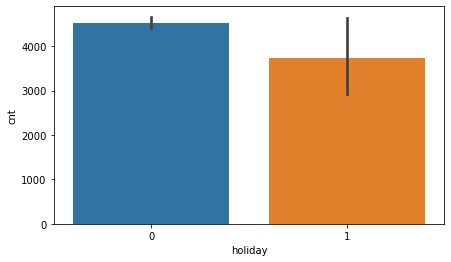

In [26]:
plt.figure(figsize=(7,4))
sns.barplot(x='holiday',y='cnt',data=boom_bikes)
plt.show()

#### 5.weekday

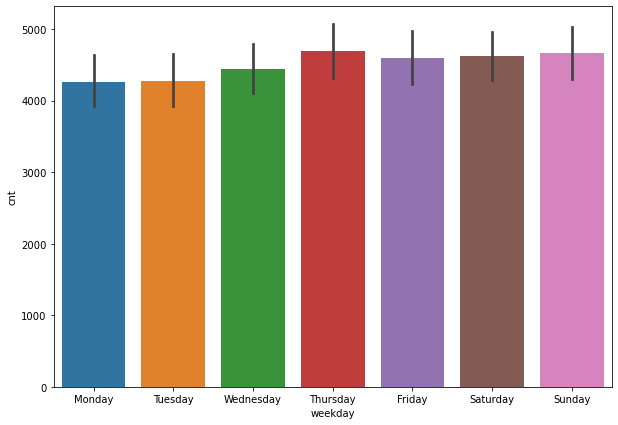

In [27]:
plt.figure(figsize=(10,7))
sns.barplot(x='weekday',y='cnt',data=boom_bikes)
plt.show()

#### 6. workingday

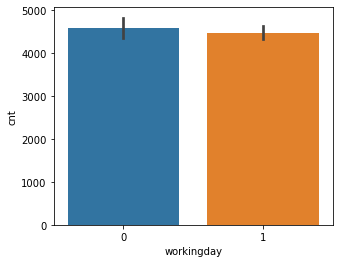

In [28]:
plt.figure(figsize=(5,4))
sns.barplot(x='workingday',y='cnt',data=boom_bikes)
plt.show()

#### 7. weathersit

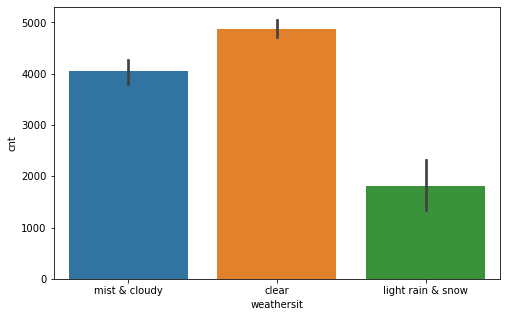

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(x='weathersit',y='cnt',data=boom_bikes)
plt.show()

### Correlation

In [30]:
boom_bikes['yr'] = boom_bikes['yr'].astype('category')
boom_bikes['holiday'] = boom_bikes['holiday'].astype('category')
boom_bikes['workingday'] = boom_bikes['workingday'].astype('category')

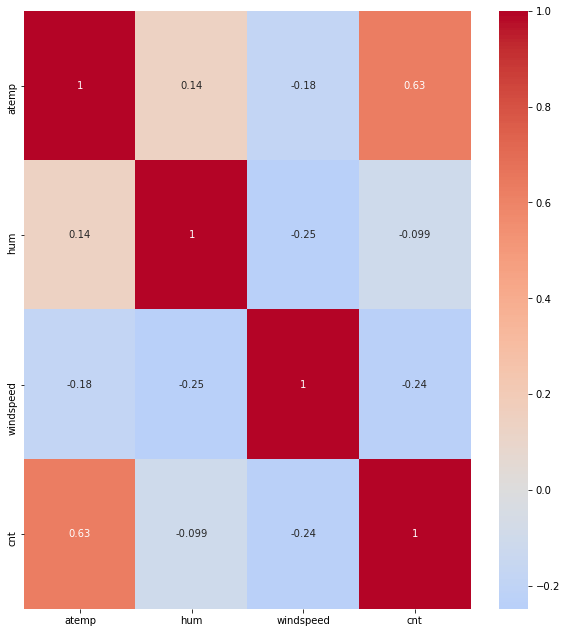

In [31]:
plt.figure(figsize=[10,11])
sns.heatmap(boom_bikes.corr(),cmap='coolwarm',center=0,annot=True)
plt.show()

* Highest correlation can be seen with atemp.

#### Visualizing the continuous variables 'atemp','humidity','windspeed' w.r.t 'cnt ' variable and Checking the impact of year.

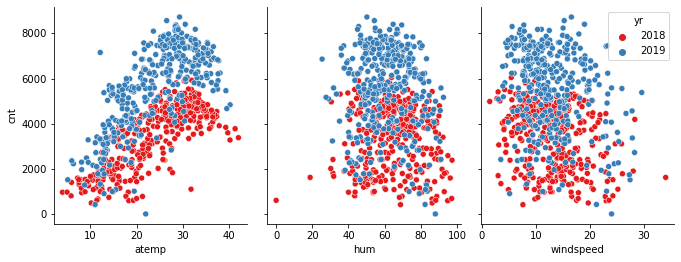

In [32]:
ax = sns.pairplot(x_vars=['atemp', 'hum', 'windspeed'], 
                  y_vars=['cnt'] , data=boom_bikes, hue='yr',
                  palette='Set1',kind='scatter',diag_kind=None)
ax.fig.set_size_inches(11,4)
ax._legend.remove()
plt.legend(title='yr')
plt.show()

#### Observations:

* Bike rental counts show a positive correlation with atemp and therefore bike rental counts increase at higher temperatures and vice-versa.

* Bike rental counts show a negative correlation with humidity and therefore bike rental counts are less at high humidity levels and vice-versa.

* Bike rental counts show a negative correlation with windspeed and therefore bike rental counts are less at high windspeed and vice-versa .

* All the parameters have increased values in 2019 compared to 2019. Thus, year may become a key paratemeter in the model.

## Data preparation.

#### Creating dummy variable columns.

In [33]:
season_indicators = pd.get_dummies(boom_bikes['season'],drop_first=True)
year_indicators = pd.get_dummies(boom_bikes['yr'],drop_first=True)
mnth_indicators = pd.get_dummies(boom_bikes['mnth'],drop_first=True)
weekday_indicators = pd.get_dummies(boom_bikes['weekday'],drop_first=True)
weathersit_indicators = pd.get_dummies(boom_bikes['weathersit'],drop_first=True)

#### Concatinating dummy variable columns with the dataset and droping the original columns.

In [34]:
boom_bikes = pd.concat([boom_bikes,season_indicators,year_indicators,mnth_indicators,weekday_indicators,weathersit_indicators],axis=1)
boom_bikes = boom_bikes.drop(columns=['season','yr','mnth','weekday','weathersit'])

In [35]:
# looking at the head of the dataset.
boom_bikes.head()

,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,2019,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,light rain & snow,mist & cloudy
0,0,1,18.18125,80.5833,10.749882,985,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,1,17.68695,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
#looking at the shape of dataset.
boom_bikes.shape

(730, 29)

In [37]:
# looking at the nature of data  and necesary information.
boom_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   holiday            730 non-null    category
 1   workingday         730 non-null    category
 2   atemp              730 non-null    float64 
 3   hum                730 non-null    float64 
 4   windspeed          730 non-null    float64 
 5   cnt                730 non-null    int64   
 6   spring             730 non-null    uint8   
 7   summer             730 non-null    uint8   
 8   winter             730 non-null    uint8   
 9   2019               730 non-null    uint8   
 10  Aug                730 non-null    uint8   
 11  Dec                730 non-null    uint8   
 12  Feb                730 non-null    uint8   
 13  Jan                730 non-null    uint8   
 14  Jul                730 non-null    uint8   
 15  Jun                730 non-null    uint8   
 16  Mar     

In [38]:
# looking the data distribution.
boom_bikes.describe()

,atemp,hum,windspeed,cnt,spring,summer,winter,2019,Aug,Dec,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,light rain & snow,mist & cloudy
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,0.500000,0.084932,0.084932,...,0.084932,0.082192,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466,0.028767,0.336986
std,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,0.500343,0.278971,0.278971,...,0.278971,0.274845,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767,0.167266,0.473004
min,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Splitting the Data into Test Set and Training set.

In [39]:
#Train and test split.
np.random.seed(0)
boom_train, boom_test = train_test_split(boom_bikes, train_size = 0.7, random_state = 100)

In [40]:
#checking the shape of train set.
boom_train.shape

(510, 29)

In [41]:
#checking the shape of test set.
boom_test.shape

(220, 29)

#### Rescaling the features

In [42]:
#Min-Max scaling
rescaled= MinMaxScaler()

In [43]:
#Apply scaler() to all the columns except the 'dummy' variables.
num_vars = ['windspeed' , 'atemp' , 'hum','cnt']

boom_train[num_vars] = rescaled.fit_transform(boom_train[num_vars])

boom_train.head()

,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,2019,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,light rain & snow,mist & cloudy
576,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
426,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
728,0,1,0.200348,0.498067,0.663106,0.204096,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
482,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0.318819,0.751824,0.380981,0.191095,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


#### Let's check the correlation coefficients to see which variables are highly correlated

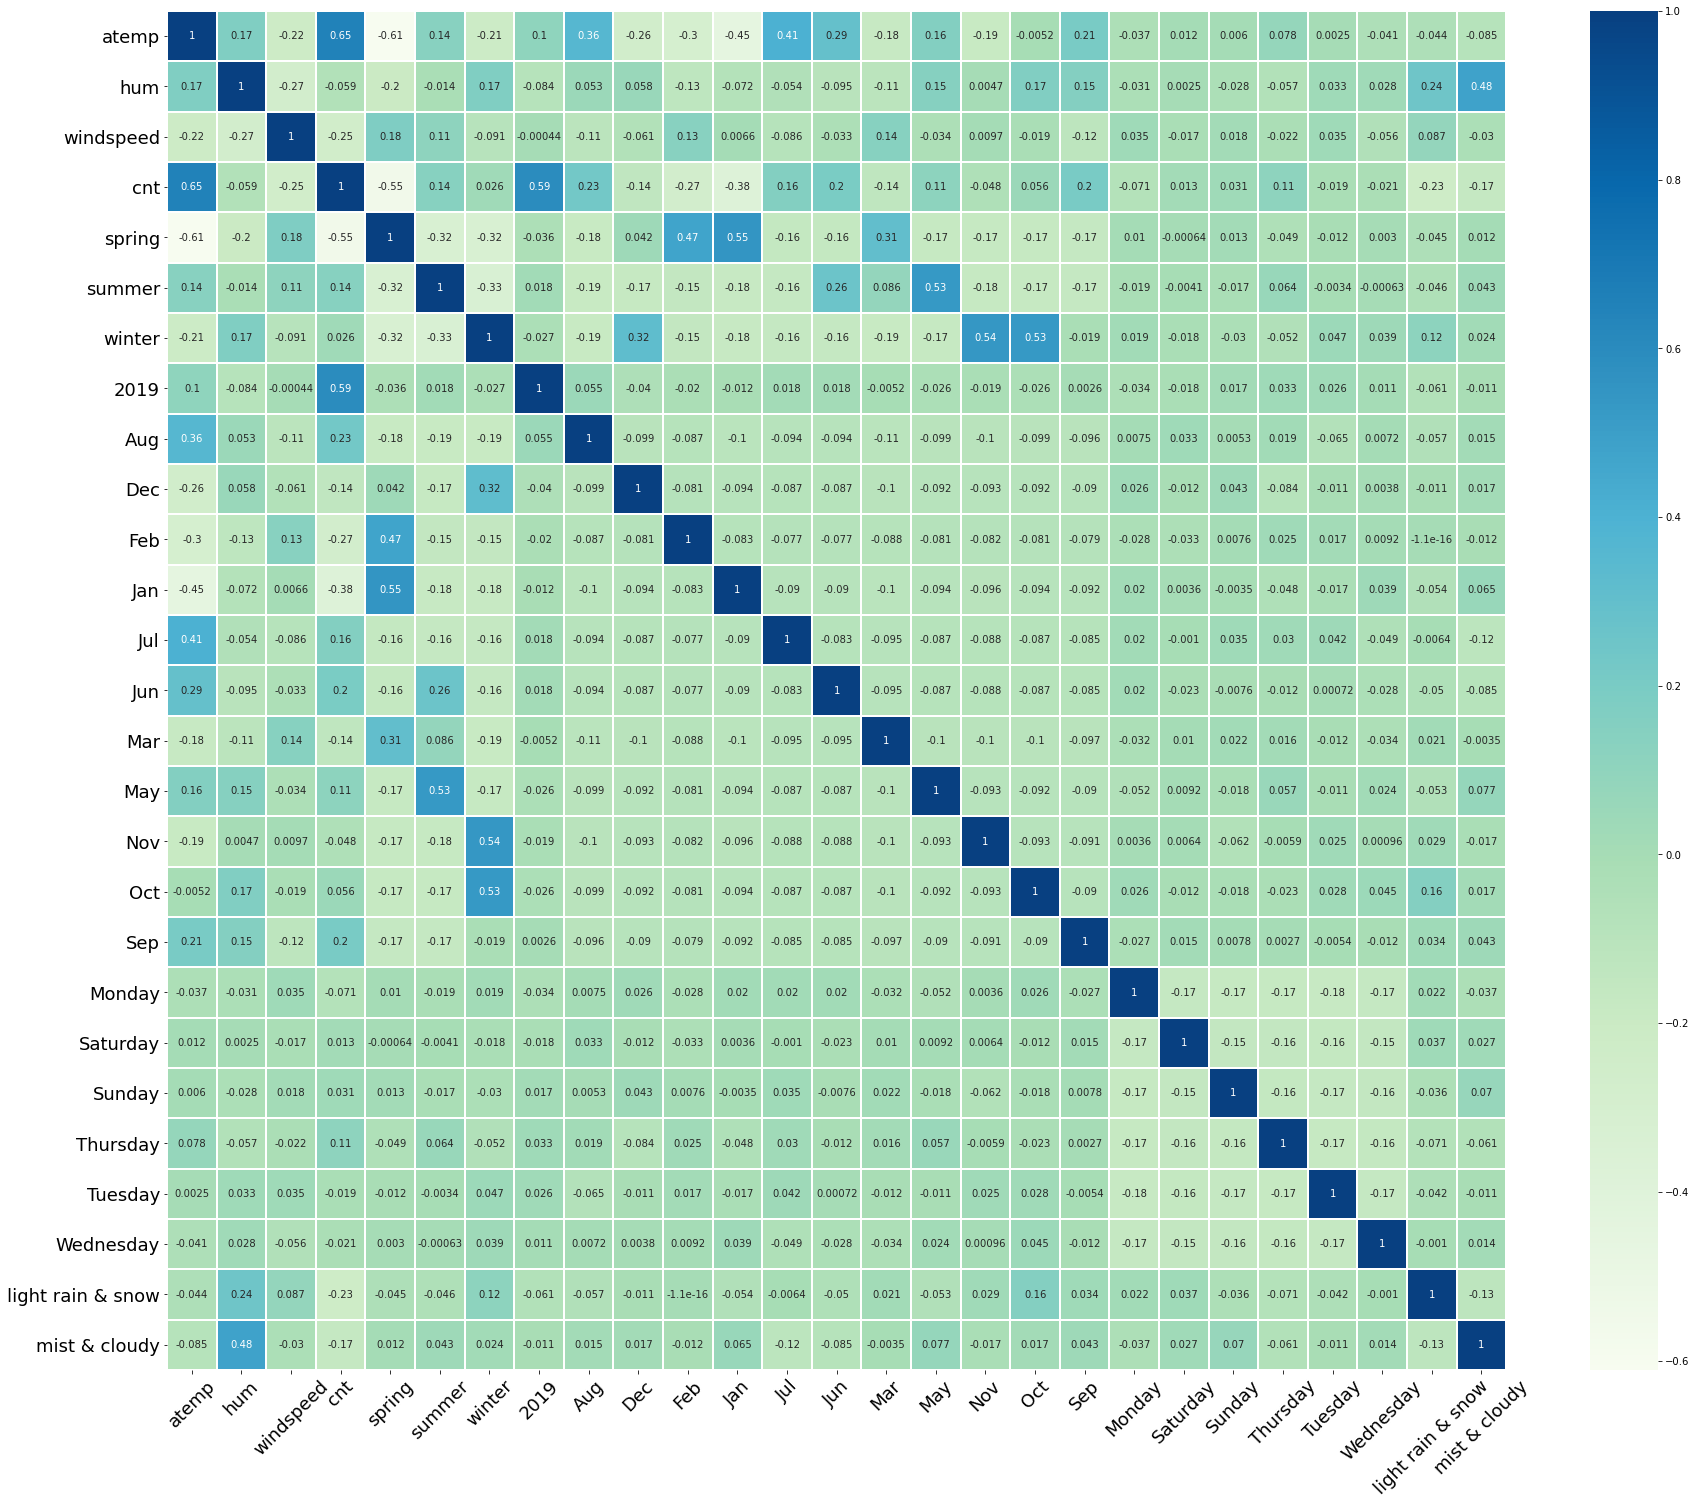

In [44]:
plt.figure(figsize = (30,25))
ax= sns.heatmap(boom_train.corr(), annot = True, cmap="GnBu",linewidth =1)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 18, rotation=45)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 18)
plt.show()

#### Observations.

various months and corresponding weather has correlation such as oct-nov with winter,may with summer and jan-feb with spring .

atemp and 2019 has strong correlation with cnt.

atemp and july has strong correlation.

Spring has highly negative correlation with cnt and atemp.

mist & cloudy weather and humidity has high correlation.




#### Dividing into X and Y sets for the model building.

In [45]:
y_train = boom_train.pop('cnt')
X_train = boom_train

## Data Modelling and Evaluation.

#### This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [46]:
# Running RFE with the output number of the variable equal to 15.
lm = LinearRegression()
lm.fit(X_train, y_train)

np.random.seed(0)
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)


In [47]:
# Checking parameters that have been selected in list of 15.
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 5),
 ('summer', True, 1),
 ('winter', True, 1),
 ('2019', True, 1),
 ('Aug', True, 1),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', False, 11),
 ('Jun', False, 7),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Monday', False, 9),
 ('Saturday', False, 3),
 ('Sunday', False, 4),
 ('Thursday', False, 13),
 ('Tuesday', False, 8),
 ('Wednesday', False, 10),
 ('light rain & snow', True, 1),
 ('mist & cloudy', True, 1)]

In [48]:
# RFE Feature Ranking and DataFraming.
rfe_ranking = pd.DataFrame({'Rank' : rfe.ranking_, 'Support': rfe.support_, 'Features' : X_train.columns})
rfe_ranking.sort_values(by='Rank',ascending=True)

,Rank,Support,Features
0,1,True,holiday
19,1,True,Sep
17,1,True,Nov
26,1,True,light rain & snow
12,1,True,Jan
11,1,True,Feb
10,1,True,Dec
9,1,True,Aug
27,1,True,mist & cloudy
7,1,True,winter


In [49]:
# storing the selected 15 variables in a list.

col = X_train.columns[rfe.support_]
col

Index(['holiday', 'atemp', 'hum', 'windspeed', 'summer', 'winter', '2019',
       'Aug', 'Dec', 'Feb', 'Jan', 'Nov', 'Sep', 'light rain & snow',
       'mist & cloudy'],
      dtype='object')

In [50]:
# Creating X_train dataframe with RFE selected variables.

X_train_rfe = X_train[col]

### Using statsmodel we build model  for the detailed statistics.

In [51]:
# Add a constant.

X_train_rfe = sm.add_constant(X_train_rfe)

In [52]:
# Create a first fitted model

lm = sm.OLS(y_train,X_train_rfe).fit() # Running the linear model

### Model - 1

In [53]:
# Check the parameters obtained

lm.params

const                0.293081
holiday             -0.083695
atemp                0.478210
hum                 -0.164661
windspeed           -0.177065
summer               0.079324
winter               0.134166
2019                 0.231187
Aug                  0.060622
Dec                 -0.048590
Feb                 -0.049655
Jan                 -0.076175
Nov                 -0.041714
Sep                  0.112064
light rain & snow   -0.240407
mist & cloudy       -0.055362
dtype: float64

In [54]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.4
Date:                Sun, 18 Apr 2021   Prob (F-statistic):          2.92e-186
Time:                        14:42:00   Log-Likelihood:                 508.08
No. Observations:                 510   AIC:                            -984.2
Df Residuals:                     494   BIC:                            -916.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2931      0.03

In the above model , according to the pvalues , all the variables are significant. Now we will have a look at the VIF of the variables to find if any multicollinearity exists betweeen any variable.

#### Variable Inflation Factor(VIF)

In [55]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,61.98
2,atemp,2.84
6,winter,2.36
11,Jan,2.26
3,hum,1.90
5,summer,1.83
12,Nov,1.78
10,Feb,1.72
9,Dec,1.64
15,mist & cloudy,1.56


VIF for the 'const' is very high, hence we will drop it.

In [56]:
# Dropping the const variable

X_train_new = X_train_rfe.drop(["const"], axis = 1)

#### updating the model

### Model - 2

In [57]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [58]:
#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

In [59]:
##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.4
Date:                Sun, 18 Apr 2021   Prob (F-statistic):          2.92e-186
Time:                        14:42:01   Log-Likelihood:                 508.08
No. Observations:                 510   AIC:                            -984.2
Df Residuals:                     494   BIC:                            -916.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2931      0.032      9.260      0.000       0.231       0.355
holiday              -0.0837      0.026     -3.226      0.001      -0.135      -0.033
atemp                 0.4782      0.032     14.978      0.000       0.415       0.541
hum                  -0.1647      0.038     -4.329      0.000      -0.239      -0.090
windspeed            -0.1771      0.026     -6.783      0.000      -0.228      -0.126
summer                0.0793      0.013      6.295      0.000       0.055       0.104
winter                0.1342      0.014      9.373      0.000       0.106       0.162
2019                  0.2312      0.008     28.305      0.000       0.215       0.247
Aug                   0.0606      0.016      3.695      0.000       0.028       0.093
Dec                  -0.0486      0.019     -2.622      0.009      -0.085      -0.012
Feb                  -0.0497      0.021     -2.348      0.019      -0.091      -0.008
Jan                  -0.0762      0.021     -3.577      0.000      -0.118      -0.034
Nov                  -0.0417      0.019     -2.186      0.029      -0.079      -0.004
Sep                   0.1121      0.017      6.709      0.000       0.079       0.145
light rain & snow    -0.2404      0.027     -9.000      0.000      -0.293      -0.188
mist & cloudy        -0.0554      0.011     -5.240      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       66.914   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.141
Skew:                          -0.671   Prob(JB):                     3.08e-37
Kurtosis:                       5.472   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the above model , according to the pvalues , all the variables are significant. Now we will have a look at the VIF of the variables to find if any multicollinearity exists betweeen any variable.

#### Variable Inflation Factor(VIF)

In [60]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,25.06
1,atemp,14.42
3,windspeed,3.90
5,winter,3.04
4,summer,2.29
14,mist & cloudy,2.24
6,2019,2.06
10,Jan,1.92
11,Nov,1.87
8,Dec,1.64


VIF for the 'hum' is very high, hence we will drop it.

In [61]:
# Dropping the 'hum' variable
X_train_new = X_train_new.drop(["hum"], axis = 1)

#### Updating the model .

### Model - 3

In [62]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     179.1
Date:                Sun, 18 Apr 2021   Prob (F-statistic):          2.01e-183
Time:                        14:42:01   Log-Likelihood:                 498.59
No. Observations:                 510   AIC:                            -967.2
Df Residuals:                     495   BIC:                            -903.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2097      0.026      8.204      0.000       0.160       0.260
holiday              -0.0850      0.026     -3.220      0.001      -0.137      -0.033
atemp                 0.4446      0.032     14.106      0.000       0.383       0.507
windspeed            -0.1491      0.026     -5.791      0.000      -0.200      -0.098
summer                0.0738      0.013      5.785      0.000       0.049       0.099
winter                0.1226      0.014      8.564      0.000       0.094       0.151
2019                  0.2351      0.008     28.454      0.000       0.219       0.251
Aug                   0.0580      0.017      3.474      0.001       0.025       0.091
Dec                  -0.0567      0.019     -3.021      0.003      -0.094      -0.020
Feb                  -0.0558      0.021     -2.601      0.010      -0.098      -0.014
Jan                  -0.0868      0.022     -4.034      0.000      -0.129      -0.045
Nov                  -0.0418      0.019     -2.153      0.032      -0.080      -0.004
Sep                   0.1048      0.017      6.194      0.000       0.072       0.138
light rain & snow    -0.2863      0.025    -11.474      0.000      -0.335      -0.237
mist & cloudy        -0.0814      0.009     -9.218      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       67.110   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.377
Skew:                          -0.678   Prob(JB):                     7.44e-37
Kurtosis:                       5.448   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the above model , according to the pvalues , all the variables are significant. Now we will have a look at the VIF of the variables to find if any multicollinearity exists betweeen any variable.

#### Variable Inflation Factor(VIF)

In [63]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,4.99
2,windspeed,3.83
4,winter,2.63
3,summer,2.06
5,2019,2.06
10,Nov,1.82
6,Aug,1.59
13,mist & cloudy,1.57
7,Dec,1.41
11,Sep,1.35


Dropping nov because this information might also be contained in winter.

In [64]:
# Dropping the 'windspeed' variable
X_train_new = X_train_new.drop(["Nov"], axis = 1)

#### Updating the model.


### Model - 4

In [65]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.1
Date:                Sun, 18 Apr 2021   Prob (F-statistic):          1.42e-183
Time:                        14:42:01   Log-Likelihood:                 496.21
No. Observations:                 510   AIC:                            -964.4
Df Residuals:                     496   BIC:                            -905.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1958      0.025      7.888      0.000       0.147       0.245
holiday              -0.0919      0.026     -3.494      0.001      -0.144      -0.040
atemp                 0.4618      0.031     15.087      0.000       0.402       0.522
windspeed            -0.1484      0.026     -5.745      0.000      -0.199      -0.098
summer                0.0776      0.013      6.118      0.000       0.053       0.103
winter                0.1096      0.013      8.410      0.000       0.084       0.135
2019                  0.2350      0.008     28.337      0.000       0.219       0.251
Aug                   0.0587      0.017      3.505      0.000       0.026       0.092
Dec                  -0.0397      0.017     -2.325      0.020      -0.073      -0.006
Feb                  -0.0468      0.021     -2.215      0.027      -0.088      -0.005
Jan                  -0.0766      0.021     -3.635      0.000      -0.118      -0.035
Sep                   0.1099      0.017      6.540      0.000       0.077       0.143
light rain & snow    -0.2821      0.025    -11.299      0.000      -0.331      -0.233
mist & cloudy        -0.0808      0.009     -9.114      0.000      -0.098      -0.063
==============================================================================
Omnibus:                       60.562   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.803
Skew:                          -0.628   Prob(JB):                     5.94e-32
Kurtosis:                       5.279   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the above model , according to the pvalues , all the variables are significant. Now we will have a look at the VIF of the variables to find if any multicollinearity exists betweeen any variable.

#### Variable Inflation Factor(VIF)

In [66]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,4.96
2,windspeed,3.76
5,2019,2.06
3,summer,2.05
4,winter,1.79
6,Aug,1.59
12,mist & cloudy,1.57
10,Sep,1.33
9,Jan,1.28
8,Feb,1.26


Dropping Feb because this information might also be contained in Jan.

In [67]:
# Dropping the 'windspeed' variable
X_train_new = X_train_new.drop(["Feb"], axis = 1)

#### Updating the model.

### Model - 5

In [68]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.0
Date:                Sun, 18 Apr 2021   Prob (F-statistic):          1.10e-183
Time:                        14:42:01   Log-Likelihood:                 493.70
No. Observations:                 510   AIC:                            -961.4
Df Residuals:                     497   BIC:                            -906.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1663      0.021      7.907      0.000       0.125       0.208
holiday              -0.0943      0.026     -3.572      0.000      -0.146      -0.042
atemp                 0.4940      0.027     18.275      0.000       0.441       0.547
windspeed            -0.1463      0.026     -5.647      0.000      -0.197      -0.095
summer                0.0887      0.012      7.574      0.000       0.066       0.112
winter                0.1222      0.012     10.370      0.000       0.099       0.145
2019                  0.2343      0.008     28.166      0.000       0.218       0.251
Aug                   0.0641      0.017      3.852      0.000       0.031       0.097
Dec                  -0.0298      0.017     -1.800      0.073      -0.062       0.003
Jan                  -0.0538      0.018     -2.915      0.004      -0.090      -0.018
Sep                   0.1153      0.017      6.910      0.000       0.083       0.148
light rain & snow    -0.2807      0.025    -11.202      0.000      -0.330      -0.231
mist & cloudy        -0.0811      0.009     -9.114      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       54.527   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.481
Skew:                          -0.567   Prob(JB):                     7.65e-29
Kurtosis:                       5.193   Cond. No.                         12.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the above model , according to the pvalues , all the variables are significant except Dec. Now we will drop Dec because it has the highest P-value among all.

In [69]:
# Dropping the 'windspeed' variable
X_train_new = X_train_new.drop(["Dec"], axis = 1)

#### Updating the model.

### Model - 6

In [70]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     222.4
Date:                Sun, 18 Apr 2021   Prob (F-statistic):          3.60e-184
Time:                        14:42:01   Log-Likelihood:                 492.05
No. Observations:                 510   AIC:                            -960.1
Df Residuals:                     498   BIC:                            -909.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1546      0.020      7.713      0.000       0.115       0.194
holiday              -0.0926      0.026     -3.503      0.001      -0.145      -0.041
atemp                 0.5067      0.026     19.374      0.000       0.455       0.558
windspeed            -0.1410      0.026     -5.465      0.000      -0.192      -0.090
summer                0.0913      0.012      7.840      0.000       0.068       0.114
winter                0.1193      0.012     10.197      0.000       0.096       0.142
2019                  0.2344      0.008     28.112      0.000       0.218       0.251
Aug                   0.0649      0.017      3.893      0.000       0.032       0.098
Jan                  -0.0465      0.018     -2.577      0.010      -0.082      -0.011
Sep                   0.1177      0.017      7.061      0.000       0.085       0.151
light rain & snow    -0.2781      0.025    -11.092      0.000      -0.327      -0.229
mist & cloudy        -0.0811      0.009     -9.095      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       51.965   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.082
Skew:                          -0.544   Prob(JB):                     3.09e-27
Kurtosis:                       5.136   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the above model , according to the pvalues , all the variables are significant. Now we will have a look at the VIF of the variables to find if any multicollinearity exists betweeen any variable.

#### Variable Inflation Factor(VIF)

In [71]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,4.95
2,windspeed,3.27
5,2019,2.04
3,summer,1.91
4,winter,1.56
6,Aug,1.56
10,mist & cloudy,1.54
8,Sep,1.31
7,Jan,1.22
9,light rain & snow,1.08


Dropping Aug because this information might also be contained in atemp.

In [72]:
# Dropping the 'Aug' variable
X_train_new = X_train_new.drop(["Aug"], axis = 1)

#### Updating the model.

### Model - 7

In [73]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     236.4
Date:                Sun, 18 Apr 2021   Prob (F-statistic):          3.88e-182
Time:                        14:42:01   Log-Likelihood:                 484.40
No. Observations:                 510   AIC:                            -946.8
Df Residuals:                     499   BIC:                            -900.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1525      0.020      7.507      0.000       0.113       0.192
holiday              -0.0950      0.027     -3.544      0.000      -0.148      -0.042
atemp                 0.5402      0.025     21.569      0.000       0.491       0.589
windspeed            -0.1455      0.026     -5.566      0.000      -0.197      -0.094
summer                0.0745      0.011      6.792      0.000       0.053       0.096
winter                0.1081      0.011      9.399      0.000       0.085       0.131
2019                  0.2350      0.008     27.796      0.000       0.218       0.252
Jan                  -0.0516      0.018     -2.823      0.005      -0.087      -0.016
Sep                   0.0997      0.016      6.139      0.000       0.068       0.132
light rain & snow    -0.2792      0.025    -10.981      0.000      -0.329      -0.229
mist & cloudy        -0.0778      0.009     -8.642      0.000      -0.095      -0.060
==============================================================================
Omnibus:                       52.516   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.132
Skew:                          -0.540   Prob(JB):                     2.47e-28
Kurtosis:                       5.195   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the above model , according to the pvalues , all the variables are significant. Now we will have a look at the VIF of the variables to find if any multicollinearity exists betweeen any variable.

### Variable Inflation Factor(VIF)

In [74]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,3.77
2,windspeed,3.26
5,2019,2.03
3,summer,1.63
9,mist & cloudy,1.53
4,winter,1.43
6,Jan,1.21
7,Sep,1.21
8,light rain & snow,1.08
0,holiday,1.04


'Feb' has information that might alreday be there in 'jan' since both had correlation with spring, hence we will drop it

In [75]:
# Dropping the 'Feb' variable
X_train_new = X_train_new.drop(["Jan"], axis = 1)

#### Updating the model.

### Model - 8

In [76]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     258.2
Date:                Sun, 18 Apr 2021   Prob (F-statistic):          1.21e-181
Time:                        14:42:02   Log-Likelihood:                 480.36
No. Observations:                 510   AIC:                            -940.7
Df Residuals:                     500   BIC:                            -898.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1222      0.017      7.035      0.000       0.088       0.156
holiday              -0.0960      0.027     -3.557      0.000      -0.149      -0.043
atemp                 0.5757      0.022     26.388      0.000       0.533       0.619
windspeed            -0.1356      0.026     -5.198      0.000      -0.187      -0.084
summer                0.0822      0.011      7.686      0.000       0.061       0.103
winter                0.1207      0.011     11.302      0.000       0.100       0.142
2019                  0.2340      0.009     27.509      0.000       0.217       0.251
Sep                   0.1023      0.016      6.260      0.000       0.070       0.134
light rain & snow    -0.2769      0.026    -10.822      0.000      -0.327      -0.227
mist & cloudy        -0.0789      0.009     -8.713      0.000      -0.097      -0.061
==============================================================================
Omnibus:                       52.600   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.234
Skew:                          -0.523   Prob(JB):                     7.10e-30
Kurtosis:                       5.285   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the above model , according to the pvalues , all the variables are significant. Now we will have a look at the VIF of the variables to find if any multicollinearity exists betweeen any variable.

#### Variable Inflation Factor(VIF)

In [77]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,3.69
2,windspeed,3.01
5,2019,2.00
3,summer,1.58
8,mist & cloudy,1.48
4,winter,1.38
6,Sep,1.20
7,light rain & snow,1.08
0,holiday,1.04


##### We can consider this as Final and acceptable model because:

We see that the total number of parameters/variables are less than 10 and their P-Value is almost equal to 0. 

VIF of all the parameters/variables are less than 5. 

F-statistic: 258.2 (which is greater than 1)

Prob (F-statistic):	1.21e-181 (which is ~0.0000)

R-squared for training set : 0.823 ( 82.3 %)

Adj R-squared for training set: 0.820 ( 82 %)

##### Which shows that it is a Good Model.


#### Final Model Interpretation

##### Hypothesis Testing :

Hypothesis Testing States that

H0:B1=B2=...=Bn=0

H1: at least one Bi!=0

In [78]:
# Checking the parameters obtained

lm.params

const                0.122249
holiday             -0.095974
atemp                0.575695
windspeed           -0.135597
summer               0.082208
winter               0.120650
2019                 0.233955
Sep                  0.102261
light rain & snow   -0.276911
mist & cloudy       -0.078879
dtype: float64

From the Final Model - 8 summary, it is evident that all our coefficients are not equal to zero 
i;e we REJECT the NULL HYPOTHESIS.

##### Our linear regression equation comes out as,

Count=0.122249-(0.095974 x holiday ) + (0.575695 x atemp) - (0.135597 x windspeed) + (0.082208 x summer) 
     + (0.120650 x winter) + (0.233955 x 2019) + (0.102261 x Sep) - (0.276911 x light rain & snow) - (0.078879 x mist & cloudy)

### Residual Analysis 

In [79]:
y_train_count = lm.predict(X_train_lm)

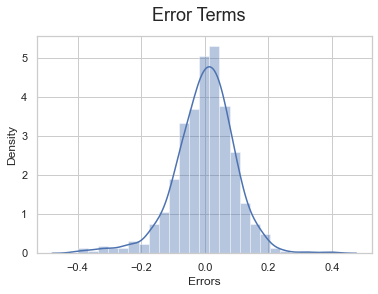

In [80]:
# Plotting the histogram for the errors.
sns.set_theme(style='whitegrid')
grph = plt.figure()
sns.distplot((y_train - y_train_count), bins = 25)
grph.suptitle('Error Terms', fontsize = 18)                   
plt.xlabel('Errors', fontsize = 12) 
plt.show()

Errors are normally distributed.

### Making Predictions Using the Final Model.

##### Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. eighth model.

##### Applying the scaling on the test sets.

In [81]:
# Applying Scaling to the continuous numeric columns: windspeed , atemp , hum, cnt .

num_vars = ['windspeed' , 'atemp' , 'hum','cnt']

boom_test[num_vars] = rescaled.transform(boom_test[num_vars])

In [82]:
boom_test.head()

,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,2019,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,light rain & snow,mist & cloudy
184,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0.496145,0.837699,0.334206,0.303382,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
221,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0.741471,0.314298,0.537414,0.569029,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


#### Dividing into X_test and y_test sets for the model building.

In [83]:
y_test = boom_test.pop('cnt')
X_test = boom_test

In [84]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [85]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Model Evaluation.

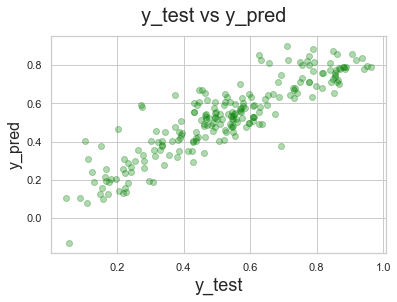

In [86]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred,color='green',alpha=0.30)
fig.suptitle('y_test vs y_pred', fontsize=20)      # Plot heading 
plt.xlabel('y_test', fontsize=18)                  # X-label
plt.ylabel('y_pred', fontsize=16)                  # Y-label
plt.show()

The predicted values and actual/test values have a linear relationship.

#### R-squared value calculation for Test set.

In [87]:
# We find the R-squared using the formula and rounding off to 4 decimal places.
r2=r2_score(y_test, y_pred)
round(r2,4)

0.7951

#### Adjusted R2 Value Calculation for boom_test.

In [88]:
# n is number of rows in test dataset
n = X_test_new.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test_new.shape[1]

# We find the Adjusted R-squared using the formula and rounding off to 4 decimal places.
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.7853

In [89]:
# calculating the  Root Mean Squared Error, Mean Absolute error and Mean Squared Error.
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))



RMSE: 0.09898486772006816
MAE: 0.07676088073017284
MSE: 0.009798004037559392


#### Comparing test set and train set.

R-squared for train set : 0.823 ( 82.3 %)

R-squared for test set : 0.7951 ( 79.51%)
 
 
Adj R-squared for train set: 0.820  ( 82 %)

Adj R-squared for test set: 0.7853 ( 78.53%)

It seems to be really a good model that can generalize various datasets.

### Final model report

##### Our linear regression equation comes out as,

Count=0.122249-(0.095974 x holiday ) + (0.575695 x atemp) - (0.135597 x windspeed) + (0.082208 x summer) + (0.120650 x winter) + (0.233955 x 2019) + (0.102261 x Sep) - (0.276911 x light rain & snow) - (0.078879 x mist & cloudy)

#### From the model we got the following parameters that are significant in predicting the demand of boom bikes.

* holiday             -0.095974
* atemp                0.575695
* windspeed           -0.135597
* summer               0.082208
* winter               0.120650
* 2019                 0.233955
* Sep                  0.102261
* light rain & snow   -0.276911
* mist & cloudy       -0.078879

#### Top 5 most significant variables affecting the demand are:

* atemp: feeling temperature in Celsius.
* summer season.
* winter season.
* year 2019. 
* Month of September. 

#### Threse variables are of prime importance while planning to achieve maximum business for bike rental booking.
#### As rise in Hot and cold seasons and the feeling temperature increases the business and the month of semptember has been most successful along with the year 2019 which means the business was growing year after year before the covid-19 panademic hit.